# Assignment 2 specification

The purpose of this assignment is to use clustering and classification to predict various aspects of internet users based on data collected from a survey.

The survey has a large number of columns (features) so you will need to choose a suitable subset both for clustering and for classification.

The rest of this notebook provides basic help with preparing the data for analysis.

## Background

In [37]:
import pandas as pd

See https://www.openml.org/d/372 for description and https://www.openml.org/data/download/52407/internet_usage.arff for the data file itself. The data comprises mostly binary and some categorical (multi-valued) columns, with just 2 numeric columns, all relating to internet users circa 1997.

The first thing to do is to load the data.

In [38]:
from scipy.io import arff
filePath = 'internet_usage.arff'
data, meta = arff.loadarff(filePath)
df = pd.DataFrame(data)
df.head()

,Actual_Time,Age,Community_Building,Community_Membership_Family,Community_Membership_Hobbies,Community_Membership_None,Community_Membership_Other,Community_Membership_Political,Community_Membership_Professional,Community_Membership_Religious,...,Web_Page_Creation,Who_Pays_for_Access_Dont_Know,Who_Pays_for_Access_Other,Who_Pays_for_Access_Parents,Who_Pays_for_Access_School,Who_Pays_for_Access_Self,Who_Pays_for_Access_Work,Willingness_to_Pay_Fees,Years_on_Internet,who
0,b'Consultant',b'41',b'Equally',b'0',b'0',b'1',b'0',b'0',b'0',b'0',...,b'Yes',b'0',b'0',b'0',b'0',b'1',b'0',b'Other_sources',b'1-3_yr',b'93819'
1,b'College_Student',b'28',b'Equally',b'0',b'0',b'0',b'0',b'0',b'0',b'0',...,b'No',b'0',b'0',b'0',b'0',b'1',b'0',b'Already_paying',b'Under_6_mo',b'95708'
2,b'Other',b'25',b'More',b'1',b'1',b'0',b'0',b'0',b'1',b'0',...,b'Yes',b'0',b'0',b'0',b'0',b'1',b'1',b'Other_sources',b'1-3_yr',b'97218'
3,b'Salesperson',b'28',b'More',b'0',b'0',b'0',b'1',b'0',b'0',b'0',...,b'Yes',b'0',b'0',b'0',b'0',b'1',b'0',b'Already_paying',b'1-3_yr',b'91627'
4,b'K-12_Student',b'17',b'More',b'0',b'0',b'0',b'0',b'1',b'1',b'0',...,b'Yes',b'0',b'0',b'0',b'0',b'1',b'0',b'Already_paying',b'1-3_yr',b'49906'


As can be seen, the data is loaded into a dataframe but in a binary representation. We choose to convert the binary text into strings, as they are much easier to handle.

In [39]:
for col in df.columns:
  df[col] = df[col].apply(lambda x: x.decode("utf-8"))
df.head()

,Actual_Time,Age,Community_Building,Community_Membership_Family,Community_Membership_Hobbies,Community_Membership_None,Community_Membership_Other,Community_Membership_Political,Community_Membership_Professional,Community_Membership_Religious,...,Web_Page_Creation,Who_Pays_for_Access_Dont_Know,Who_Pays_for_Access_Other,Who_Pays_for_Access_Parents,Who_Pays_for_Access_School,Who_Pays_for_Access_Self,Who_Pays_for_Access_Work,Willingness_to_Pay_Fees,Years_on_Internet,who
0,Consultant,41,Equally,0,0,1,0,0,0,0,...,Yes,0,0,0,0,1,0,Other_sources,1-3_yr,93819
1,College_Student,28,Equally,0,0,0,0,0,0,0,...,No,0,0,0,0,1,0,Already_paying,Under_6_mo,95708
2,Other,25,More,1,1,0,0,0,1,0,...,Yes,0,0,0,0,1,1,Other_sources,1-3_yr,97218
3,Salesperson,28,More,0,0,0,1,0,0,0,...,Yes,0,0,0,0,1,0,Already_paying,1-3_yr,91627
4,K-12_Student,17,More,0,0,0,0,1,1,0,...,Yes,0,0,0,0,1,0,Already_paying,1-3_yr,49906


The dataframe looks more standard now, but we notice that there is abn anonymised user code 'who' which is a candidate for the dataframe's index. We check that each row has a unique 'who' value:

In [40]:
numRows = df.shape[0]
numUniq = len(df['who'].unique().tolist())
print(numRows-numUniq)

0


It does, so we set 'who' as the index and it no longer appears in the list of columns, which we can check below.

In [41]:
if 'who' in df.columns:
  df.set_index('who', inplace=True)

print(df.columns)

Index(['Actual_Time', 'Age', 'Community_Building',
       'Community_Membership_Family', 'Community_Membership_Hobbies',
       'Community_Membership_None', 'Community_Membership_Other',
       'Community_Membership_Political', 'Community_Membership_Professional',
       'Community_Membership_Religious', 'Community_Membership_Support',
       'Country', 'Disability_Cognitive', 'Disability_Hearing',
       'Disability_Motor', 'Disability_Not_Impaired', 'Disability_Not_Say',
       'Disability_Vision', 'Education_Attainment',
       'Falsification_of_Information', 'Gender', 'Household_Income',
       'How_You_Heard_About_Survey_Banner',
       'How_You_Heard_About_Survey_Friend',
       'How_You_Heard_About_Survey_Mailing_List',
       'How_You_Heard_About_Survey_Others',
       'How_You_Heard_About_Survey_Printed_Media',
       'How_You_Heard_About_Survey_Remebered',
       'How_You_Heard_About_Survey_Search_Engine',
       'How_You_Heard_About_Survey_Usenet_News',
       'How_You_Heard

As can be seen, we have ensured that the 'who' column is no longer available as a feature. Also note that all columns are treated as 'object', effectively as strings. For your convenience, I have classified the columns for you, see below. I have also changed the types of numeric and 'boolean' (0,1)-valued columns. The latter are then binarised and ready for analysis.

According to the data description, the original internet_usage data had 2699 missing values in the 'Primary_Computing_Platform' column. In this version of the dataset, the missing values have already been replaced with '?', see below, so no further action is needed.

In [42]:
col = 'Primary_Computing_Platform'
df[col].value_counts()

Win95        4359
?            2699
Macintosh    1466
Windows       581
NT            450
Unix          212
Dont_Know      87
OS2            84
PC_Unix        76
DOS            54
Other          33
VT100           7
Name: Primary_Computing_Platform, dtype: int64

## Clustering Task 1

1. Reviewing the data and its data dictionary, choose candidate feature subsets (with a maximum of 10 features per subset) that might be used to cluster the internet usage data described above. Justify your choice of feature subsets.


Features Selected =  ['Actual_Time', 'Community_Building', 'Country', 'Education_Attainment',
                     'Falsification_of_Information','Household_Income', 'Major_Geographical_Location', 'Marital_Status',
           'Most_Import_Issue_Facing_the_Internet', 'Primary_Computing_Platform','Not_Purchasing_Easier_locally', 'Age']

### Reason for selection:
The first set of features tested were primarily boolean and did not support a good result when clustered using hierarchical clustering.
Therefore the second set of features were reviewed. The purpose behind the chosen features was to look at clusters of internet_usage along the age and other social factors theme such as marital status, income, location and their purchasing habits versus internet opinions and behaviour (falsifying information and issues facing the internet.) I think there is a lot of useful opinion based information available from this feature selection which could benefit analysis of culture trends in relation to internet usage and opinion towards its usage.

## Clustering Task 2
For each candidate feature subset, use hierarchical clustering, k-means, GMM and DBSCAN algorithms on it to identify possible groups of internet users.

### Data Encoding
This section will prepare data by use of one hot encoding to convert all column values to numeric for use with clustering algorithms.

In [43]:
from sklearn.preprocessing import OneHotEncoder
import random

featureStringCols = ['Actual_Time', 'Community_Building', 'Country', 'Education_Attainment',
                     'Falsification_of_Information','Household_Income', 'Major_Geographical_Location', 'Marital_Status',
           'Most_Import_Issue_Facing_the_Internet', 'Primary_Computing_Platform']

featureBoolCols = ['Not_Purchasing_Easier_locally']
featureIntCols = ['Age']

for col in featureIntCols:
  df[col] = pd.to_numeric(df[col], errors='coerce')

for col in featureBoolCols:
  df[col] = df[col].map({'0': 0, '1': 1})

ohe = dict()

# Choose a seed so that this code is repeatable, and select some features for the model 
random.seed(42)
originalStrCols = random.sample(featureStringCols,k=10)
print(originalStrCols)
sampledBoolCols = random.sample(featureBoolCols,k=1)
print(sampledBoolCols)
sampledIntCols = random.sample(featureIntCols,k=1)
print(sampledIntCols)

# Create an empty dataframe
featureSub = pd.DataFrame()

for col in originalStrCols:
  ohe[col] = OneHotEncoder(sparse=False)
  X = ohe[col].fit_transform(df[col].values.reshape(-1,1))
  # See https://stackoverflow.com/a/4843172
  dfOneHot = pd.DataFrame(X, columns = [col+'-'+str(int(i)) for i in range(X.shape[1])])
  featureSub = pd.concat([featureSub, dfOneHot], axis=1)

# Assign the index so that it matches that of the original df
featureSub.set_axis(df.index, axis='index', inplace=True)

# Add in the sampledBoolcols
featureSub = pd.concat([featureSub, df[sampledBoolCols]], axis=1)

# Add in the sampledIntcols
featureSub = pd.concat([featureSub, df[sampledIntCols]], axis=1)

# fill NaN values in dataset
featureSub.fillna(featureSub.mean(), inplace=True)

['Community_Building', 'Actual_Time', 'Falsification_of_Information', 'Primary_Computing_Platform', 'Major_Geographical_Location', 'Household_Income', 'Most_Import_Issue_Facing_the_Internet', 'Country', 'Education_Attainment', 'Marital_Status']
['Not_Purchasing_Easier_locally']
['Age']


In [44]:
featureSub.head()

,Community_Building-0,Community_Building-1,Community_Building-2,Community_Building-3,Actual_Time-0,Actual_Time-1,Actual_Time-2,Actual_Time-3,Actual_Time-4,Actual_Time-5,...,Education_Attainment-8,Marital_Status-0,Marital_Status-1,Marital_Status-2,Marital_Status-3,Marital_Status-4,Marital_Status-5,Marital_Status-6,Not_Purchasing_Easier_locally,Age
who,,,,,,,,,,,,,,,,,,,,,
93819,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,41.0
95708,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,28.0
97218,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,25.0
91627,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,28.0
49906,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,17.0


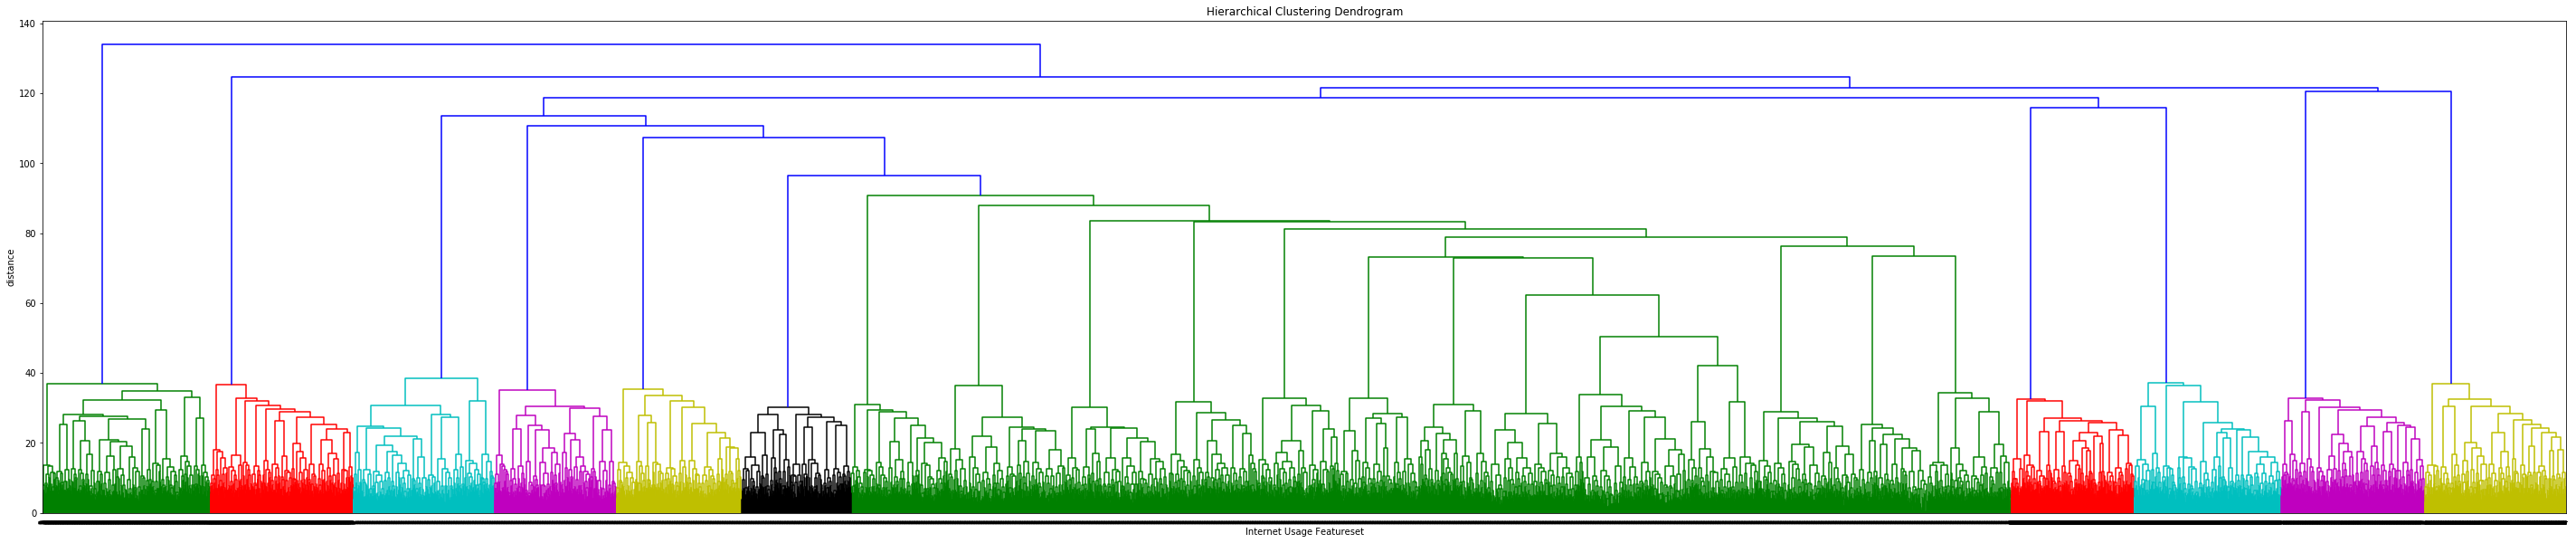

In [45]:
#EXPORT to CSV
featureSub.to_csv('oheTransformedData.csv', encoding='utf-8', index=False)

from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(featureSub)
data.shape

import numpy as np # linear algebra
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

Z = linkage(data, 'ward')
res = cut_tree(Z, n_clusters=6)
labels = np.ravel(res)
plt.figure(figsize=(50, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Internet Usage Featureset')
plt.ylabel('distance')
dendrogram(
    Z,
    labels=labels,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()